# Random exchange economic model

The rules of the game:

* All participants start with equal wealth
* At each step, pick 2 people at random, and transfer a small fixed amount of wealth from one to another
* (Unless of course it's impossible. No negative wealth is allowed)

Questions:
* What will be the distribution of wealth after enough time?
* What will be the individual trajectories of wealth? How's about social mobility?
* What if you add compound interest?
* Calculate Gini coefficient.
* See the effects of Universal Basic Income (or progressive taxation, except that UBI is easier to code)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Gini coefficient: https://en.wikipedia.org/wiki/Gini_coefficient

${\displaystyle G=1-{\frac {2}{n-1}}\left(n-{\frac {\sum _{i=1}^{n}iy_{i}}{\sum _{i=1}^{n}y_{i}}}\right).}$

In [2]:
def gini(x):
    n = len(x)
    return 1-2/(n-1)*(n-np.dot(np.arange(1,n+1),sorted(x))/(np.sum(x)))

# Testing:
print('Equality, should be 0:',gini([1]*100))
print('Extreme oligarchy, should be 1:',gini([100]+[0]*99))
print('Linear, should be ~1/3:',gini(np.arange(1,100)))

Equality, should be 0: 0.0
Extreme oligarchy, should be 1: 1.0
Linear, should be ~1/3: 0.33333333333333326


### Simple model, fixed transaction, wealth income

Top 10% own that % of wealth: 15.489930354292314


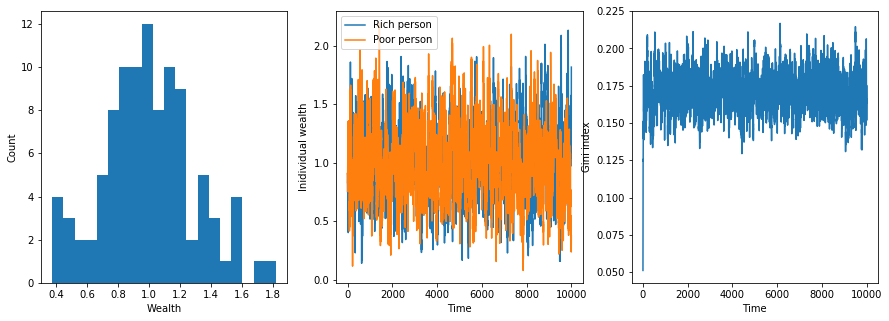

In [43]:
n_people = 100
n_steps = 10000
amount = 0.1
growth = 0.000           # Market growth at each time cycle
tax_wealth = 0.05        # Wealth tax rate, to be collected, and redistributed as UBI

def model():
    wealth = np.ones(n_people) # Original wealth
    history = np.zeros(shape=(n_steps,n_people))
    ghist = np.zeros(n_steps)                       # History of gini coefficients
    for t in range(n_steps):
        for i in range(n_people):
            j = np.random.randint(n_people)
            if wealth[i] >= amount:
                wealth[i] -= amount
                wealth[j] += amount
        wealth = wealth*(1 + growth)*(1-tax_wealth) + tax_wealth*np.mean(wealth)
        history[t,:] = wealth
    return history


# Run model
history = model()
ghist = [gini(history[i,:]) for i in range(history.shape[0])]

# Figures
fig = plt.figure(figsize=(15,5))
plt.subplot(131);
plt.hist(history[-1,:], bins=20);
plt.xlabel('Wealth');
plt.ylabel('Count')

plt.subplot(132);
i_rich = np.argmax(history[-1,:])
i_poor = np.argmin(history[-1,:])
plt.plot(history[:,i_rich], label="Rich person");
plt.plot(history[:,i_poor], label="Poor person");
plt.ylabel('Inidividual wealth');
plt.xlabel('Time');
plt.legend(loc="upper left")

plt.subplot(133);
plt.plot(ghist);
plt.ylabel('Gini index');
plt.xlabel('Time');

wealth = np.sort(history[-1,:])
print('Top 10% own that % of wealth:', np.sum(wealth[(n_people-n_people//10):]) / np.sum(wealth) * 100)

### Income tax

Top 10% own that % of wealth: 31.34440000000382


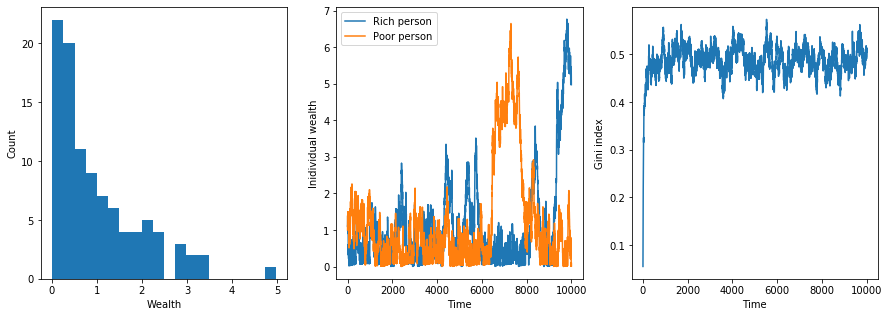

In [54]:
n_people = 100
n_steps = 10000
amount = 0.1             # The amount spent every cycle
growth = 0.000           # Market growth at each time cycle
tax_wealth = 0.00        # Wealth tax rate, to be collected, and redistributed as UBI
tax_income = 0.02        # Income tax

def model():
    wealth = np.ones(n_people) # Original wealth
    history = np.zeros(shape=(n_steps,n_people))
    ghist = np.zeros(n_steps)                       # History of gini coefficients
    for t in range(n_steps):
        taxes = 0
        for i in range(n_people):
            j = np.random.randint(n_people)
            if wealth[i] >= amount:
                wealth[i] -= amount
                wealth[j] += amount*(1-tax_income)
                taxes += amount*tax_income
        taxes += tax_wealth*np.sum(wealth)
        wealth = wealth*(1 + growth)*(1-tax_wealth) + taxes/n_people
        history[t,:] = wealth
    return history


# Run model
history = model()
ghist = [gini(history[i,:]) for i in range(history.shape[0])]

# Figures
fig = plt.figure(figsize=(15,5))
plt.subplot(131);
plt.hist(history[-1,:], bins=20);
plt.xlabel('Wealth');
plt.ylabel('Count')

plt.subplot(132);
i_rich = np.argmax(history[-1,:])
i_poor = np.argmin(history[-1,:])
plt.plot(history[:,i_rich], label="Rich person");
plt.plot(history[:,i_poor], label="Poor person");
plt.ylabel('Inidividual wealth');
plt.xlabel('Time');
plt.legend(loc="upper left")

plt.subplot(133);
plt.plot(ghist);
plt.ylabel('Gini index');
plt.xlabel('Time');

wealth = np.sort(history[-1,:])
print('Top 10% own that % of wealth:', np.sum(wealth[(n_people-n_people//10):]) / np.sum(wealth) * 100)

Top 10% own that % of wealth: 15.906969785102328
Average wealth of top 10%: 1.590696978510233
Average wealth of top 1%: 1.895491191150094


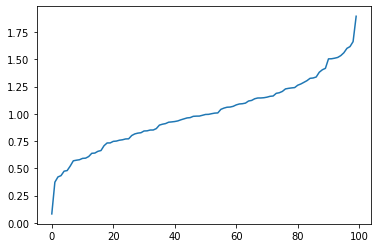

In [27]:
wealth = np.sort(history[-1,:])
plt.plot(wealth)
print('Top 10% own that % of wealth:', np.sum(wealth[(n_people-n_people//10):]) / np.sum(wealth) * 100)
print('Average wealth of top 10%:', np.sum(wealth[(n_people-n_people//10):]) / (n_people//10))
print('Average wealth of top 1%:', np.sum(wealth[(n_people-n_people//100):]) / (n_people//100))

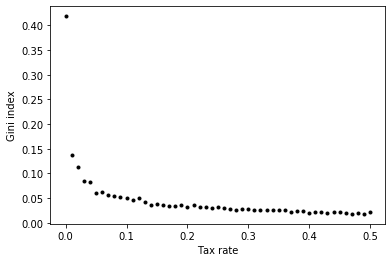

In [8]:
for tax in np.arange(0,0.51,0.01):
    history = model()
    plt.plot(tax,gini(history[-1,:]),'k.')
plt.xlabel('Tax rate');
plt.ylabel('Gini index');